# DataArray

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
data = np.random.rand(4, 3)
locs = ['IA', 'IL', 'IN']
times = pd.date_range('2000-01-01', periods=4)
foo = xr.DataArray(data, coords=[times, locs], dims=['time', 'space'])
foo

<xarray.DataArray (time: 4, space: 3)>
array([[0.95800598, 0.39342031, 0.76135945],
       [0.50226822, 0.85546642, 0.24740474],
       [0.8038271 , 0.22376362, 0.3875628 ],
       [0.52875934, 0.52523807, 0.84768293]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

In [3]:
# minimal init 
xr.DataArray(data)

<xarray.DataArray (dim_0: 4, dim_1: 3)>
array([[0.95800598, 0.39342031, 0.76135945],
       [0.50226822, 0.85546642, 0.24740474],
       [0.8038271 , 0.22376362, 0.3875628 ],
       [0.52875934, 0.52523807, 0.84768293]])
Dimensions without coordinates: dim_0, dim_1

In [4]:
xr.DataArray(data, coords=[('time', times), ('space', locs)])

<xarray.DataArray (time: 4, space: 3)>
array([[0.95800598, 0.39342031, 0.76135945],
       [0.50226822, 0.85546642, 0.24740474],
       [0.8038271 , 0.22376362, 0.3875628 ],
       [0.52875934, 0.52523807, 0.84768293]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

In [5]:
xr.DataArray(
    data, 
    coords={'time': times, 
            'space': locs, 
            'const': 42, 
            'ranking': ('space', [1, 2, 3])},
    dims=['time', 'space'])

<xarray.DataArray (time: 4, space: 3)>
array([[0.95800598, 0.39342031, 0.76135945],
       [0.50226822, 0.85546642, 0.24740474],
       [0.8038271 , 0.22376362, 0.3875628 ],
       [0.52875934, 0.52523807, 0.84768293]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
    const    int64 42
    ranking  (space) int64 1 2 3

In [6]:
xr.DataArray(
    data,
    coords={'time': times,
            'space': locs,
            'const': 42,
            'ranking': (('time', 'space'), np.arange(12).reshape(4, 3))},
    dims=['time', 'space'])

<xarray.DataArray (time: 4, space: 3)>
array([[0.95800598, 0.39342031, 0.76135945],
       [0.50226822, 0.85546642, 0.24740474],
       [0.8038271 , 0.22376362, 0.3875628 ],
       [0.52875934, 0.52523807, 0.84768293]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
    const    int64 42
    ranking  (time, space) int64 0 1 2 3 4 5 6 7 8 9 10 11

In [7]:
df = pd.DataFrame({'x': [0, 1], 'y': [2, 3]}, index=['a', 'b'])
df.index.name = 'abc'
df.columns.name = 'xyz'
df

xyz,x,y
abc,,
a,0,2
b,1,3


In [8]:
xr.DataArray(df)

<xarray.DataArray (abc: 2, xyz: 2)>
array([[0, 2],
       [1, 3]])
Coordinates:
  * abc      (abc) object 'a' 'b'
  * xyz      (xyz) object 'x' 'y'

# DataArray Properties

In [9]:
foo.values

array([[0.95800598, 0.39342031, 0.76135945],
       [0.50226822, 0.85546642, 0.24740474],
       [0.8038271 , 0.22376362, 0.3875628 ],
       [0.52875934, 0.52523807, 0.84768293]])

In [10]:
foo.dims

('time', 'space')

In [11]:
foo.coords

Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

In [12]:
foo.attrs

{}

In [13]:
print(foo.name)

None


In [14]:
foo.values = 1.1 * foo.values
foo.values

array([[1.05380658, 0.43276234, 0.83749539],
       [0.55249504, 0.94101306, 0.27214521],
       [0.88420981, 0.24613998, 0.42631908],
       [0.58163528, 0.57776187, 0.93245122]])

In [15]:
foo.name = 'foo'
foo.attrs['units'] = 'meters'
foo

<xarray.DataArray 'foo' (time: 4, space: 3)>
array([[1.05380658, 0.43276234, 0.83749539],
       [0.55249504, 0.94101306, 0.27214521],
       [0.88420981, 0.24613998, 0.42631908],
       [0.58163528, 0.57776187, 0.93245122]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
Attributes:
    units:    meters

In [16]:
foo.rename('foofoo')

<xarray.DataArray 'foofoo' (time: 4, space: 3)>
array([[1.05380658, 0.43276234, 0.83749539],
       [0.55249504, 0.94101306, 0.27214521],
       [0.88420981, 0.24613998, 0.42631908],
       [0.58163528, 0.57776187, 0.93245122]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
Attributes:
    units:    meters

In [17]:
foo.coords['time']

<xarray.DataArray 'time' (time: 4)>
array(['2000-01-01T00:00:00.000000000', '2000-01-02T00:00:00.000000000',
       '2000-01-03T00:00:00.000000000', '2000-01-04T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04

In [18]:
foo['time']

<xarray.DataArray 'time' (time: 4)>
array(['2000-01-01T00:00:00.000000000', '2000-01-02T00:00:00.000000000',
       '2000-01-03T00:00:00.000000000', '2000-01-04T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04

In [19]:
foo['ranking'] = ('space', [1, 2, 3])
foo.coords

Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
    ranking  (space) int64 1 2 3

In [20]:
del foo['ranking']
foo.coords

Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

### Dataset

In [21]:
temp = 15 + 8*np.random.randn(2, 2, 3)
precip = 10 * np.random.randn(2, 2, 3)
lon = [[-99.83, -99.32], [-99.79, -99.23]]
lat = [[42.25, 42.21], [42.63, 42.59]]
ds = xr.Dataset({'temperature': (['x', 'y', 'time'], temp),
                 'precipitation': (['x', 'y', 'time'])},
                coords={'lon': (['x', 'y', lon]),
                        'lat': (['x', 'y', lat]),
                        'time': pd.date_range('2014-09-06', periods=3),
                        'reference_time': pd.Timestamp('2014-09-05')})
ds

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<xarray.Dataset>
Dimensions:         (lat: 3, lon: 3, precipitation: 3, time: 3, x: 2, y: 2)
Coordinates:
  * precipitation   (precipitation) <U4 'x' 'y' 'time'
  * lon             (lon) object 'x' 'y' [[-99.83, -99.32], [-99.79, -99.23]]
  * lat             (lat) object 'x' 'y' [[42.25, 42.21], [42.63, 42.59]]
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 22.95 23.54 22.73 ... 24.96 22.66 7.622

In [22]:
xr.Dataset(dict(bar=foo))

<xarray.Dataset>
Dimensions:  (space: 3, time: 4)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
Data variables:
    bar      (time, space) float64 1.054 0.4328 0.8375 ... 0.5816 0.5778 0.9325

In [23]:
xr.Dataset(dict(bar=foo.to_pandas()))

<xarray.Dataset>
Dimensions:  (space: 3, time: 4)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) object 'IA' 'IL' 'IN'
Data variables:
    bar      (time, space) float64 1.054 0.4328 0.8375 ... 0.5816 0.5778 0.9325

### Dataset contents

In [24]:
'temperature' in ds

True

In [25]:
ds['temperature']

<xarray.DataArray 'temperature' (x: 2, y: 2, time: 3)>
array([[[22.94871425, 23.53662109, 22.73239834],
        [26.60846906, 16.45317887, 14.08914405]],

       [[30.15467547,  0.96856953, 17.18159485],
        [24.95758086, 22.65774644,  7.62219194]]])
Coordinates:
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y

In [26]:
ds.temperature

<xarray.DataArray 'temperature' (x: 2, y: 2, time: 3)>
array([[[22.94871425, 23.53662109, 22.73239834],
        [26.60846906, 16.45317887, 14.08914405]],

       [[30.15467547,  0.96856953, 17.18159485],
        [24.95758086, 22.65774644,  7.62219194]]])
Coordinates:
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y

In [27]:
ds.data_vars

Data variables:
    temperature  (x, y, time) float64 22.95 23.54 22.73 ... 24.96 22.66 7.622

In [28]:
ds.coords

Coordinates:
  * precipitation   (precipitation) <U4 'x' 'y' 'time'
  * lon             (lon) object 'x' 'y' [[-99.83, -99.32], [-99.79, -99.23]]
  * lat             (lat) object 'x' 'y' [[42.25, 42.21], [42.63, 42.59]]
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05

In [29]:
ds.attrs

{}

In [30]:
ds.attrs['title'] = 'Example Attribute'
ds

<xarray.Dataset>
Dimensions:         (lat: 3, lon: 3, precipitation: 3, time: 3, x: 2, y: 2)
Coordinates:
  * precipitation   (precipitation) <U4 'x' 'y' 'time'
  * lon             (lon) object 'x' 'y' [[-99.83, -99.32], [-99.79, -99.23]]
  * lat             (lat) object 'x' 'y' [[42.25, 42.21], [42.63, 42.59]]
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 22.95 23.54 22.73 ... 24.96 22.66 7.622
Attributes:
    title:    Example Attribute

### Dictionary-like Methods

In [31]:
ds = xr.Dataset()
ds['temperature'] = (('x', 'y', 'time'), temp)
ds['temperature_double'] = (('x', 'y', 'time'), 2 * temp)
ds['precipitation'] = (('x', 'y', 'time'), precip)
ds.coords['lat'] = (('x', 'y'), lat)
ds.coords['lon'] = (('x', 'y'), lon)
ds.coords['time'] = pd.date_range('2014-09-06', periods=3)
ds.coords['reference_time'] = pd.Timestamp('2014-09-05')

### Transforming Data Sets

In [32]:
ds[['temperature']]

<xarray.Dataset>
Dimensions:         (time: 3, x: 2, y: 2)
Coordinates:
    lat             (x, y) float64 42.25 42.21 42.63 42.59
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 22.95 23.54 22.73 ... 24.96 22.66 7.622

In [33]:
ds[['temperature', 'temperature_double']]

<xarray.Dataset>
Dimensions:             (time: 3, x: 2, y: 2)
Coordinates:
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature         (x, y, time) float64 22.95 23.54 22.73 ... 22.66 7.622
    temperature_double  (x, y, time) float64 45.9 47.07 45.46 ... 45.32 15.24

In [34]:
ds.drop_vars('temperature')

<xarray.Dataset>
Dimensions:             (time: 3, x: 2, y: 2)
Coordinates:
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature_double  (x, y, time) float64 45.9 47.07 45.46 ... 45.32 15.24
    precipitation       (x, y, time) float64 -0.4974 -15.44 ... 12.32 -4.687

In [35]:
ds.drop_dims('time')

<xarray.Dataset>
Dimensions:         (x: 2, y: 2)
Coordinates:
    lat             (x, y) float64 42.25 42.21 42.63 42.59
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    *empty*

In [36]:
ds.assign(temp2=2 * ds.temperature)

<xarray.Dataset>
Dimensions:             (time: 3, x: 2, y: 2)
Coordinates:
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature         (x, y, time) float64 22.95 23.54 22.73 ... 22.66 7.622
    temperature_double  (x, y, time) float64 45.9 47.07 45.46 ... 45.32 15.24
    precipitation       (x, y, time) float64 -0.4974 -15.44 ... 12.32 -4.687
    temp2               (x, y, time) float64 45.9 47.07 45.46 ... 45.32 15.24

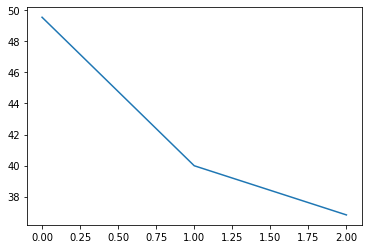

In [37]:
plt.plot((2 * ds.temperature.sel(x=0)).mean('y'));

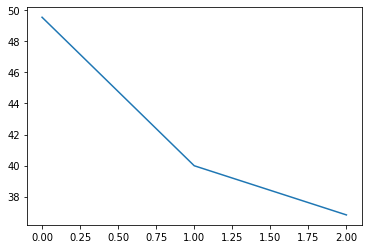

In [38]:
(ds.temperature.sel(x=0).pipe(lambda x: 2 * x).mean('y').pipe(plt.plot));

### Renaming Vars

In [39]:
ds.rename({'temperature': 'temp', 'precipitation': 'precip'})

<xarray.Dataset>
Dimensions:             (time: 3, x: 2, y: 2)
Coordinates:
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temp                (x, y, time) float64 22.95 23.54 22.73 ... 22.66 7.622
    temperature_double  (x, y, time) float64 45.9 47.07 45.46 ... 45.32 15.24
    precip              (x, y, time) float64 -0.4974 -15.44 ... 12.32 -4.687

In [42]:
ds.coords['day'] = ('time', [6, 7, 8])
ds.swap_dims({'time': 'day'})

<xarray.Dataset>
Dimensions:             (day: 3, x: 2, y: 2)
Coordinates:
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
    time                (day) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
  * day                 (day) int64 6 7 8
Dimensions without coordinates: x, y
Data variables:
    temperature         (x, y, day) float64 22.95 23.54 22.73 ... 22.66 7.622
    temperature_double  (x, y, day) float64 45.9 47.07 45.46 ... 45.32 15.24
    precipitation       (x, y, day) float64 -0.4974 -15.44 ... 12.32 -4.687

### Coordinates

In [43]:
ds.coords

Coordinates:
    lat             (x, y) float64 42.25 42.21 42.63 42.59
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
    day             (time) int64 6 7 8

In [44]:
ds.reset_coords()

<xarray.Dataset>
Dimensions:             (time: 3, x: 2, y: 2)
Coordinates:
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
Dimensions without coordinates: x, y
Data variables:
    temperature         (x, y, time) float64 22.95 23.54 22.73 ... 22.66 7.622
    temperature_double  (x, y, time) float64 45.9 47.07 45.46 ... 45.32 15.24
    precipitation       (x, y, time) float64 -0.4974 -15.44 ... 12.32 -4.687
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
    reference_time      datetime64[ns] 2014-09-05
    day                 (time) int64 6 7 8

In [45]:
ds.set_coords(['temperature', 'precipitation'])

<xarray.Dataset>
Dimensions:             (time: 3, x: 2, y: 2)
Coordinates:
    temperature         (x, y, time) float64 22.95 23.54 22.73 ... 22.66 7.622
    precipitation       (x, y, time) float64 -0.4974 -15.44 ... 12.32 -4.687
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
    day                 (time) int64 6 7 8
Dimensions without coordinates: x, y
Data variables:
    temperature_double  (x, y, time) float64 45.9 47.07 45.46 ... 45.32 15.24

In [46]:
ds['temperature'].reset_coords(drop=True)

<xarray.DataArray 'temperature' (x: 2, y: 2, time: 3)>
array([[[22.94871425, 23.53662109, 22.73239834],
        [26.60846906, 16.45317887, 14.08914405]],

       [[30.15467547,  0.96856953, 17.18159485],
        [24.95758086, 22.65774644,  7.62219194]]])
Coordinates:
  * time     (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
Dimensions without coordinates: x, y

### Coordinate Methods

In [47]:
ds.coords.to_dataset()

<xarray.Dataset>
Dimensions:         (time: 3, x: 2, y: 2)
Coordinates:
    lat             (x, y) float64 42.25 42.21 42.63 42.59
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
    day             (time) int64 6 7 8
Dimensions without coordinates: x, y
Data variables:
    *empty*

In [48]:
alt = xr.Dataset(coords={'z': [10], 'lat': 0, 'lon': 0})
ds.coords.merge(alt.coords)

<xarray.Dataset>
Dimensions:         (time: 3, z: 1)
Coordinates:
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
    day             (time) int64 6 7 8
  * z               (z) int64 10
Data variables:
    *empty*

### Indices